# Performance Analysis

In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import pandas as pd
import numpy as np
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from preprocessing import preprocessed_books_data, preprocessed_books_rating
from sentiment import sentiment

In [54]:
cfg = yaml.safe_load(open("config.yaml"))

In [4]:
books_rating = preprocessed_books_rating(cfg)

In [5]:
books_data = preprocessed_books_data(cfg)

## Sentiment Analysis

In [8]:
_full_text = books_rating['full_text'].loc[0]
print(_full_text)
print(sentiment(_full_text))

Pudovkin. A must read for film lovers and students. Gives you an important outline of film basics and standards. This is a book within the bible of Film.
Sentiment(polarity=0.4, subjectivity=1.0)


Running in a small sample to estimate the running time:

In [ ]:
# n_texts = 10000

# sentiment_scores = pd.DataFrame(
#     books_rating['full_text'].iloc[:n_texts].apply(sentiment).to_list(),
#     columns=['polarity', 'subjectivity']
# )

In [14]:
sentiment_scores = pd.DataFrame(
    books_rating['full_text'].apply(sentiment).to_list(),
    columns=['polarity', 'subjectivity']
)

In [29]:
sentiment_scores.head()

,polarity,subjectivity
0,0.400000,1.000000
1,-0.006250,0.460000
2,0.193333,0.583333
3,0.352778,0.713095
4,0.398214,0.638095


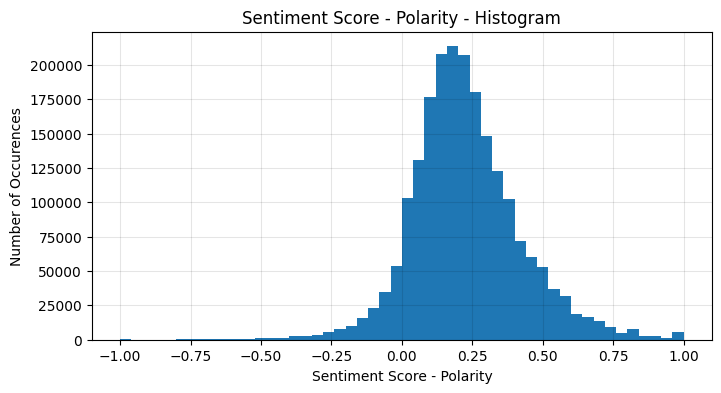

In [19]:
plt.figure(figsize=(8, 4))
sentiment_scores['polarity'].hist(bins=50)
plt.title("Sentiment Score - Polarity - Histogram")
plt.xlabel("Sentiment Score - Polarity")
plt.ylabel("Number of Occurences")
plt.grid(c='k', alpha=0.1)
plt.show()

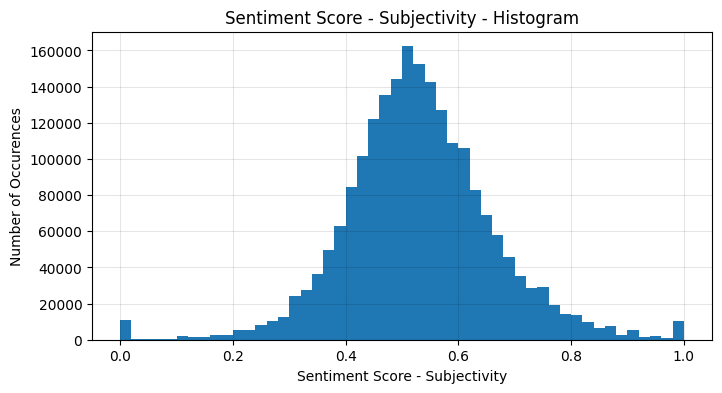

In [17]:
plt.figure(figsize=(8, 4))
sentiment_scores['subjectivity'].hist(bins=50)
plt.title("Sentiment Score - Subjectivity - Histogram")
plt.xlabel("Sentiment Score - Subjectivity")
plt.ylabel("Number of Occurences")
plt.grid(c='k', alpha=0.1)
plt.show()

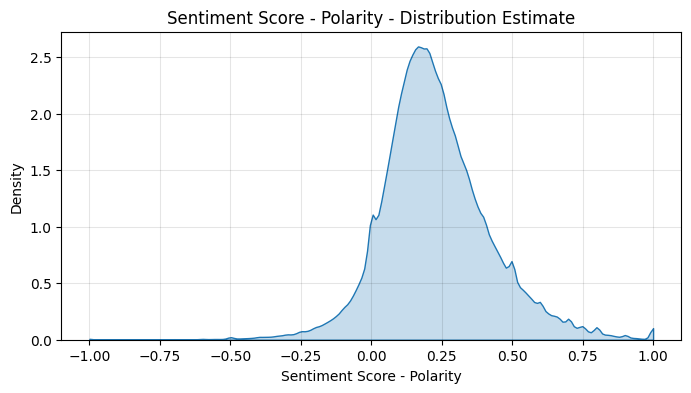

In [22]:
plt.figure(figsize=(8, 4))
sns.kdeplot(
    sentiment_scores['polarity'],
    fill=True,
    clip=(-1, 1),
)
plt.title("Sentiment Score - Polarity - Distribution Estimate")
plt.xlabel("Sentiment Score - Polarity")
plt.ylabel("Density")
plt.grid(c='k', alpha=0.1)
plt.show()

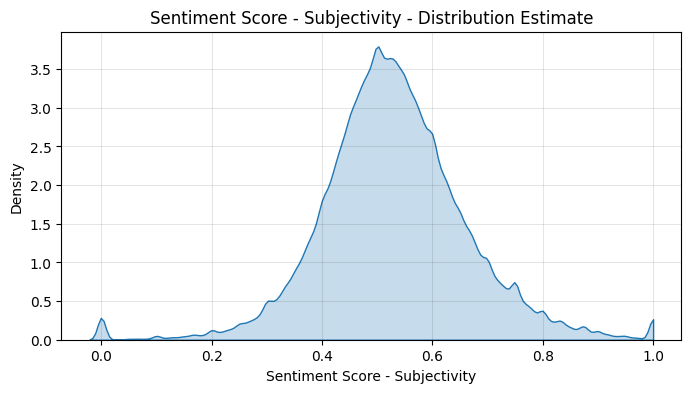

In [23]:
plt.figure(figsize=(8, 4))
sns.kdeplot(
    sentiment_scores['subjectivity'],
    fill=True,
    clip=(-1, 1),
)
plt.title("Sentiment Score - Subjectivity - Distribution Estimate")
plt.xlabel("Sentiment Score - Subjectivity")
plt.ylabel("Density")
plt.grid(c='k', alpha=0.1)
plt.show()

In [27]:
books_rating[['polarity', 'subjectivity']] = sentiment_scores[['polarity', 'subjectivity']]

In [28]:
books_rating.head()

,title,user_id,score,full_text,polarity,subjectivity
0,""" Film technique, "" and, "" Film acting """,A16MDRPUTCW4IF,5.0,Pudovkin. A must read for film lovers and stud...,0.400000,1.000000
1,""" Film technique, "" and, "" Film acting """,A3PPO4VVZKW9FI,4.0,Essential little text on editing. This volume ...,-0.006250,0.460000
2,""" We'll Always Have Paris"": The Definitive Gui...",A2XFM8PN6G0B02,5.0,"Great book. The more than 11,000 quotes in thi...",0.193333,0.583333
3,""" We'll Always Have Paris"": The Definitive Gui...",A4RXXT5KB9WVJ,5.0,I think this is the beginning of a beautiful f...,0.352778,0.713095
4,"""... And Poetry is Born ..."" Russian Classical...",A1PPF42PNXGFC3,4.0,Wonderful and unique selection of poetry. Rare...,0.398214,0.638095


## Author

In [30]:
author = 'Isaac Newton'

In [31]:
books_data.query('authors == @author')

,title,description,authors,categories
14102,Principia: Vol. II: The System of the World,This title is part of UC Press's Voices Revive...,Isaac Newton,Science
65477,An historical account of two notable corruptio...,,Isaac Newton,Bible
70175,"Observations upon the Prophecies of Daniel, an...",,Isaac Newton,NaN
91930,The Principia : Mathematical Principles of Nat...,Sir Isaac Newton PRS MP (25 December 1642 - 20...,Isaac Newton,NaN
99236,The life of Sir Isaac Newton,I consider philosophy rather than arts and wri...,Isaac Newton,Science
135246,The Prophecies of Daniel and The Apocalypse (1...,,Isaac Newton,Bible


In [32]:
author_titles = books_data.query('authors == @author')['title'].unique()

In [33]:
author_ratings = books_rating.query('title.isin(@author_titles)')

In [34]:
author_ratings.head()

,title,user_id,score,full_text,polarity,subjectivity
140685,An historical account of two notable corruptio...,A1DM8B8LXIU0WP,5.0,A mind ahead of his time!. This book for me as...,0.180595,0.613690
140686,An historical account of two notable corruptio...,A5XF8UY2GGQWS,2.0,"Documentation of Biblical ""Telephone Line"". As...",0.128195,0.306767
1061046,"Observations upon the Prophecies of Daniel, an...",A11NUZ96JBF97E,4.0,Good Interpretation from a Great Scientist. Is...,0.218939,0.514394
1061047,"Observations upon the Prophecies of Daniel, an...",A124S6MYD45PIQ,2.0,A Disappointment.. While some of Newton's theo...,0.275568,0.521467
1061048,"Observations upon the Prophecies of Daniel, an...",A1DM8B8LXIU0WP,4.0,A look into a great mind and a non-trinitarian...,0.610000,0.590000


In [55]:
(
    author_ratings
    .agg({
        _score: cfg['score_agg_funcs']
        for _score in cfg['scores_to_agg']
    })
    .round(2)
)

,score,polarity,subjectivity
mean,4.17,0.20,0.49
std,1.35,0.18,0.14
count,52.00,52.00,52.00
median,5.00,0.17,0.50


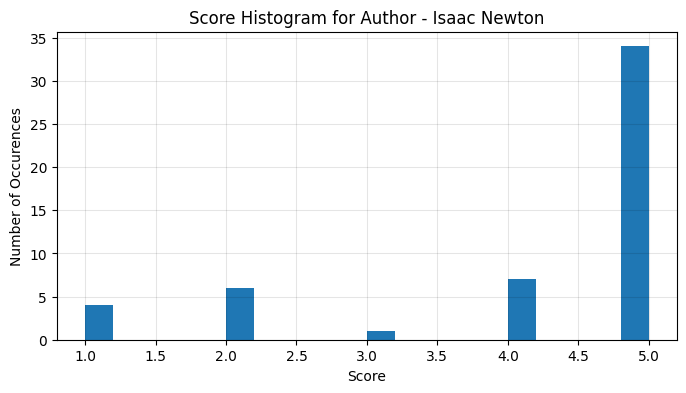

In [49]:
plt.figure(figsize=(8, 4))
author_ratings['score'].hist(bins=20)
plt.title(f"Score Histogram for Author - {author}")
plt.xlabel("Score")
plt.ylabel("Number of Occurences")
plt.grid(c='k', alpha=0.1)
plt.show()

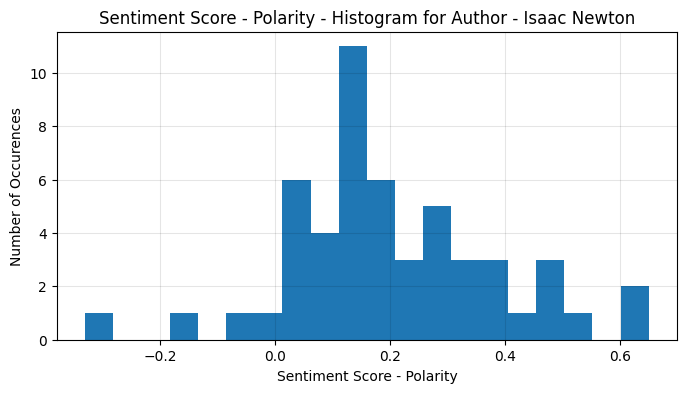

In [50]:
plt.figure(figsize=(8, 4))
author_ratings['polarity'].hist(bins=20)
plt.title(f"Sentiment Score - Polarity - Histogram for Author - {author}")
plt.xlabel("Sentiment Score - Polarity")
plt.ylabel("Number of Occurences")
plt.grid(c='k', alpha=0.1)
plt.show()

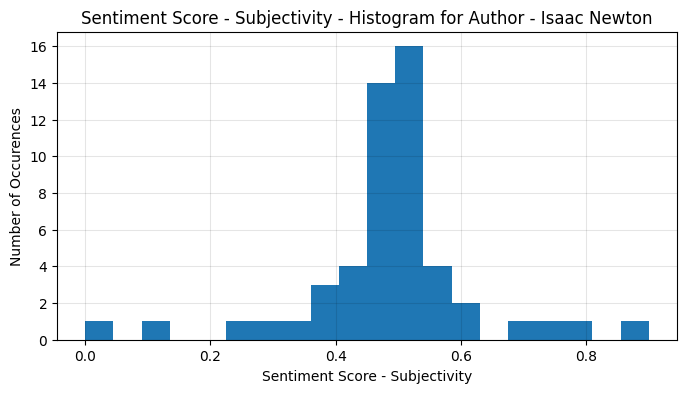

In [51]:
plt.figure(figsize=(8, 4))
author_ratings['subjectivity'].hist(bins=20)
plt.title(f"Sentiment Score - Subjectivity - Histogram for Author - {author}")
plt.xlabel("Sentiment Score - Subjectivity")
plt.ylabel("Number of Occurences")
plt.grid(c='k', alpha=0.1)
plt.show()

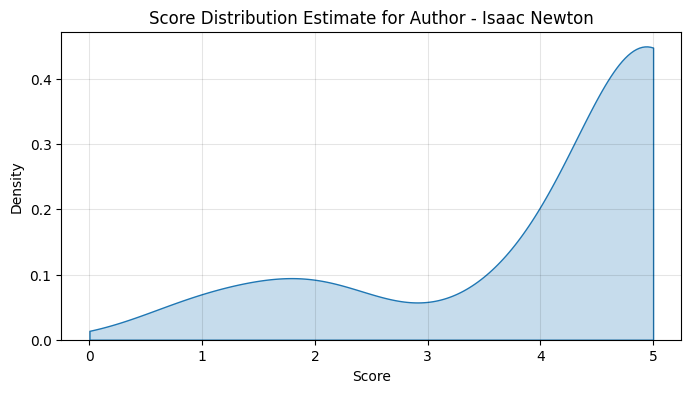

In [68]:
plt.figure(figsize=(8, 4))
sns.kdeplot(
    author_ratings['score'],
    fill=True,
    clip=(0, 5),
)
plt.title(f"Score Distribution Estimate for Author - {author}")
plt.xlabel("Score")
plt.ylabel("Density")
plt.grid(c='k', alpha=0.1)
plt.show()

In [57]:
(
    author_ratings.groupby('title')
    .agg({
        _score: cfg['score_agg_funcs']
        for _score in cfg['scores_to_agg']
    })
    .round(2)
    .reset_index()
)

title score                     \
                                                      mean   std count median   
0  An historical account of two notable corruptio...  3.50  2.12     2    3.5   
1  Observations upon the Prophecies of Daniel, an...  4.13  1.19    15    5.0   
2        Principia: Vol. II: The System of the World  5.00   NaN     1    5.0   
3  The Principia : Mathematical Principles of Nat...  4.42  1.30    26    5.0   
4  The Prophecies of Daniel and The Apocalypse (1...  4.33  0.82     6    4.5   
5                       The life of Sir Isaac Newton  1.00  0.00     2    1.0   

  polarity                    subjectivity                     
      mean   std count median         mean   std count median  
0     0.15  0.04     2   0.15         0.46  0.22     2   0.46  
1     0.22  0.26    15   0.23         0.48  0.17    15   0.51  
2     0.49   NaN     1   0.49         0.70   NaN     1   0.70  
3     0.19  0.15    26   0.13         0.49  0.14    26   0.48  
4     0.25  0.12     6   0.27         0.49  0.09     6   0.53  
5     0.03  0.12     2   0.03         0.46  0.02     2   0.46

## Category

In [58]:
category = 'Science'

In [59]:
(books_data['categories'] == category).sum()

np.int64(3930)

In [60]:
category_titles = books_data.query('categories == @category')['title'].unique()

In [61]:
category_ratings = books_rating.query('title.isin(@category_titles)')

In [62]:
category_ratings.head()

,title,user_id,score,full_text,polarity,subjectivity
3504,"100 Billion Suns: The Birth, Life, and Death o...",A1I0422Z9IK7OX,5.0,Readable and authoritative guide to stellar ev...,0.312179,0.631410
3505,"100 Billion Suns: The Birth, Life, and Death o...",A2NCKY9LO39A76,5.0,galactical. with out question one of the most ...,0.157143,0.466667
3506,"100 Billion Suns: The Birth, Life, and Death o...",A3S60WDN976HHY,5.0,The average Joe's guide to understanding the s...,0.273958,0.606771
3507,"100 Billion Suns: The Birth, Life, and Death o...",AL6F570W52AVN,4.0,"Nice book. Very good book, it was able to keep...",0.737143,0.757143
4188,1000+ The Amateur Astronomer's Field Guide to ...,A29D0KVP9ADL67,5.0,1000+ Amateur Astronomers Field Guide to Deep ...,0.176136,0.424747


In [63]:
(
    category_ratings
    .agg({
        _score: cfg['score_agg_funcs']
        for _score in cfg['scores_to_agg']
    })
    .round(2)
)

,score,polarity,subjectivity
mean,4.21,0.24,0.53
std,1.18,0.19,0.13
count,17346.00,17307.00,17307.00
median,5.00,0.22,0.52


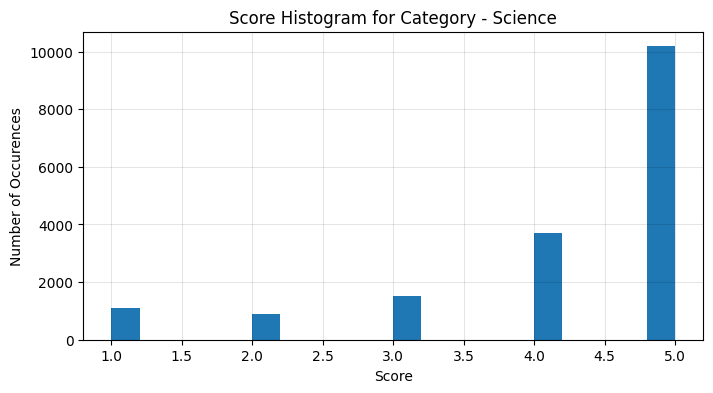

In [64]:
plt.figure(figsize=(8, 4))
category_ratings['score'].hist(bins=20)
plt.title(f"Score Histogram for Category - {category}")
plt.xlabel("Score")
plt.ylabel("Number of Occurences")
plt.grid(c='k', alpha=0.1)
plt.show()

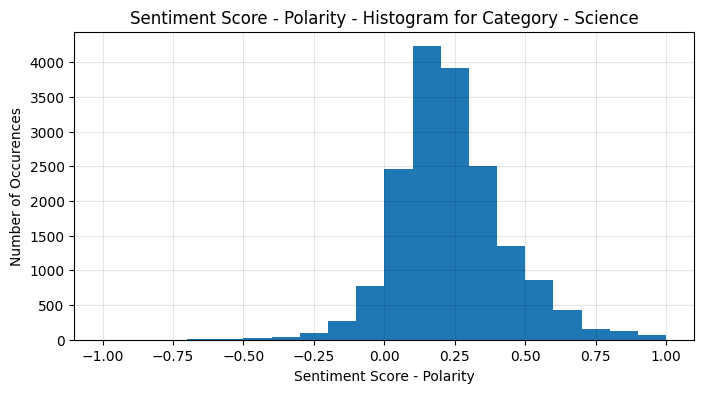

In [65]:
plt.figure(figsize=(8, 4))
category_ratings['polarity'].hist(bins=20)
plt.title(f"Sentiment Score - Polarity - Histogram for Category - {category}")
plt.xlabel("Sentiment Score - Polarity")
plt.ylabel("Number of Occurences")
plt.grid(c='k', alpha=0.1)
plt.show()

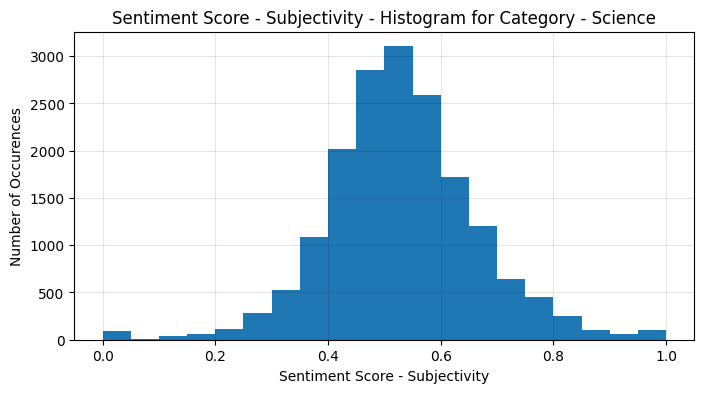

In [66]:
plt.figure(figsize=(8, 4))
category_ratings['subjectivity'].hist(bins=20)
plt.title(f"Sentiment Score - Subjectivity - Histogram for Category - {category}")
plt.xlabel("Sentiment Score - Subjectivity")
plt.ylabel("Number of Occurences")
plt.grid(c='k', alpha=0.1)
plt.show()

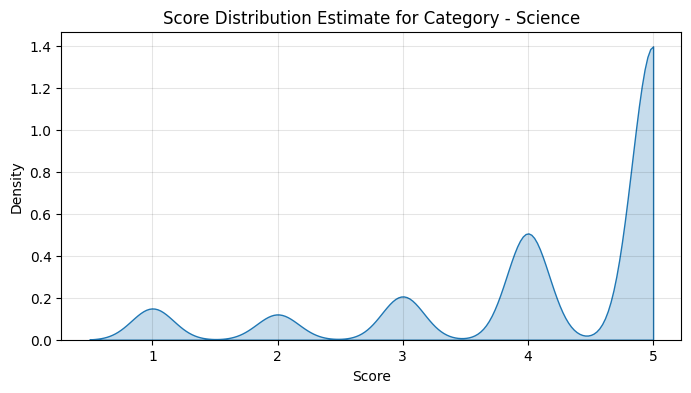

In [67]:
plt.figure(figsize=(8, 4))
sns.kdeplot(
    category_ratings['score'],
    fill=True,
    clip=(0, 5),
)
plt.title(f"Score Distribution Estimate for Category - {category}")
plt.xlabel("Score")
plt.ylabel("Density")
plt.grid(c='k', alpha=0.1)
plt.show()